In [9]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import scipy.optimize as optimization

In [11]:
#stocks we will analyse

stocks = ['AAPL','WMT','TSLA','GE','AMZN','DB']

#historical data - Start and End Dates

NUM_TRADING_DAYS = 252
NUM_PORTFOLIOS = 10000

start_date = '2010-01-01'
end_date = '2017-01-01'

def download_data():
    
    #name of the stocks as key - stock values as value (2010 -2017)
    
    stock_data = {}
    
    for stock in stocks:
        #closing prices
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date , end = end_date)['Close']
    
    return pd.DataFrame(stock_data)


def show_data(data):
    data.plot(figsize= (15,7))
    plt.show()

    
def calculate_return(data):
    # Use log for Normalization of Values
    log_return = np.log(data/data.shift(1))
    return log_return[1:]
    
def show_statistics(returns):
    print(returns.mean()*NUM_TRADING_DAYS)
    print(returns.cov()*NUM_TRADING_DAYS)


def show_portfolios(returns, volatilities):
    plt.figure(figsize=(10,6))
    plt.scatter(volatilities,returns,c = returns/volatilities , marker = 'o')
    plt.grid(True)
    plt.xlabel("Expected Volatility")
    plt.ylabel("Expected Returns")
    plt.colorbar(label = "Sharpe Ratio")
    plt.show()
    

#def show_mean_variance(returns,weights):
    #annual return
    #portfolio_return = np.sum(returns.mean()*weights)*NUM_TRADING_DAYS
    #portfolio_volatility = np.sqrt(np.dot(np.transpose(weights) ,np.dot(returns.cov()*NUM_TRADING_DAYS,weights)))
    #print("Expected Portfolio Mean(return)" portfolio_return)
    #print("Expected Portfolio volatility(return)" portfolio_volatility)    
    
def generate_portfolios(returns):
    
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []
    
    for _ in range(NUM_PORTFOLIOS):
        w = np.random.random(len(stocks))
        w/= np.sum(w)
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(w*returns.mean())*NUM_TRADING_DAYS)
        portfolio_risks.append(np.sqrt(np.dot(np.transpose(w) ,np.dot(returns.cov()*NUM_TRADING_DAYS,w))))
    return np.array(portfolio_weights), np.array(portfolio_means),np.array(portfolio_risks)
        
    
                               
    
                               
                               
    
                               

        

In [12]:
def statistics(weights,returns):
    portfolio_return = np.sum(returns.mean()*weights)*NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(np.dot(np.transpose(weights) ,np.dot(returns.cov()*NUM_TRADING_DAYS,weights)))
    return np.array([portfolio_return,portfolio_volatility,portfolio_return/portfolio_volatility])

def min_function_sharpe(weights,returns):
    return -statistics(weights,returns)[2]

def optimize_portfolio(weights,returns):
    constraints = { 'type' : 'eq' , 'fun' : lambda x: np.sum(x) - 1}
    
    bounds = tuple((0,1) for _ in range(len(stocks)))
    return optimization.minimize(fun = min_function_sharpe,x0 = weights[0],args = returns, method = 'SLSQP', bounds = bounds, constraints = constraints)


def print_optimal_portfolio(optimum,returns):
    print("Optimal Portfolio is", (optimum.x).round(3))
    print("Optimal return, volatility , sharpe ratio is", statistics(optimum.x.round(3), returns))

def show_opt_portfolios(opt, rets, portfolio_rets,portfolio_vols):
    plt.figure(figsize=(10,6))
    plt.scatter(portfolio_vols,portfolio_rets,c = portfolio_rets/portfolio_vols , marker = 'o')
    plt.grid(True)
    plt.xlabel("Expected Volatility")
    plt.ylabel("Expected Returns")
    plt.colorbar(label = "Sharpe Ratio")
    plt.plot(statistics(opt.x,rets)[1],statistics(opt.x,rets)[0],'g*',markersize = 20)
    plt.show()

    

Optimal Portfolio is [0.36  0.085 0.138 0.163 0.254 0.   ]
Optimal return, volatility , sharpe ratio is [0.21092375 0.20317564 1.03813507]


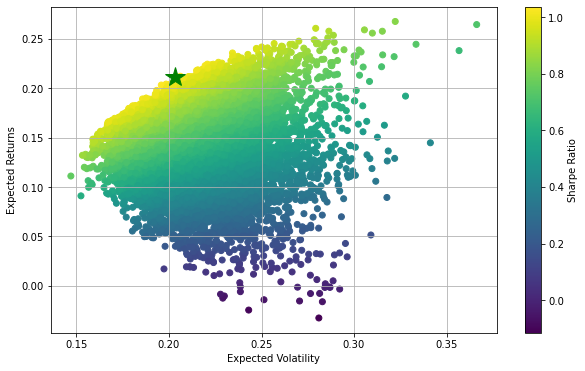

In [13]:
if __name__ == '__main__':
    dataset = download_data()
    #show_data(dataset)
    log_daily_returns = calculate_return(dataset)
    #show_statistics(log_daily_returns)
    pweights, means , risks = generate_portfolios(log_daily_returns)
    #show_portfolios(means, risks)
    opt = optimize_portfolio(pweights,log_daily_returns)
    print_optimal_portfolio(opt,log_daily_returns)
    show_opt_portfolios(opt,log_daily_returns,means,risks)
